# TextBlob Practice

In [225]:
from textblob import TextBlob
from my_functions import text_reader
import matplotlib.pyplot as plt

In [226]:
text = "Tiffany and I are in a cute coffee shop. The coffee is good. We like Python"

In [227]:
analysis = TextBlob(text)

In [228]:
type(analysis)

textblob.blob.TextBlob

In [229]:
analysis.tags

[('Tiffany', 'NN'),
 ('and', 'CC'),
 ('I', 'PRP'),
 ('are', 'VBP'),
 ('in', 'IN'),
 ('a', 'DT'),
 ('cute', 'JJ'),
 ('coffee', 'NN'),
 ('shop', 'NN'),
 ('The', 'DT'),
 ('coffee', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('We', 'PRP'),
 ('like', 'VBP'),
 ('Python', 'NNP')]

In [230]:
analysis.sentiment

Sentiment(polarity=0.6, subjectivity=0.8)

In [231]:
analysis.sentences

[Sentence("Tiffany and I are in a cute coffee shop."),
 Sentence("The coffee is good."),
 Sentence("We like Python")]

In [232]:
sentence = TextBlob("je suis tres heuresse et je me suis amusee")
sentence.detect_language()

'fr'

In [233]:
sentence.translate(to='en')

TextBlob("I am very happy and I had fun")

In [234]:
IHC_novel = text_reader('/Users/BaileyDanielson/Documents/Python/IHC.txt')

In [235]:
type(IHC_novel)

str

In [236]:
IHC_analysis = TextBlob(IHC_novel)

In [237]:
IHC_sentences = IHC_analysis.sentences

In [238]:
len(IHC_sentences)

3797

In [239]:
IHC_sentences[:25]

[Sentence("
 J.M."), Sentence("Coetzee
  In the Heart of the Country
  
  
  
  
  1."), Sentence("Today my father brought home his new bride."), Sentence("They came clip-clop across
  the flats in a dog-cart drawn by a horse with an ostrich-plume waving on its
  forehead, dusty after the long haul."), Sentence("Or perhaps they were drawn by two
  plumed donkeys, that is also possible."), Sentence("My father wore his black swallowtail
  coat and stovepipe hat, his bride a wide-brimmed sunhat and a white dress
  tight at waist and throat."), Sentence("More detail I cannot give unless I begin to
  embroider, for I was not watching."), Sentence("I was in my room, in the emerald semi-
  dark of the shuttered late afternoon, reading a book or, more likely, supine
  with a damp towel over my eyes fighting a migraine."), Sentence("I am the one who stays
  in her room reading or writing or fighting migraines."), Sentence("The colonies are full of
  girls like that, but none, I think, so extrem

In [240]:
for sentence in IHC_sentences:
    sentences_analysis = TextBlob(str(sentence))
    sentences_analysis.sentiment.polarity

In [241]:
polarity_list = [TextBlob(str(sentence)).sentiment.polarity for sentence in IHC_sentences]

In [242]:
len(polarity_list)

3797

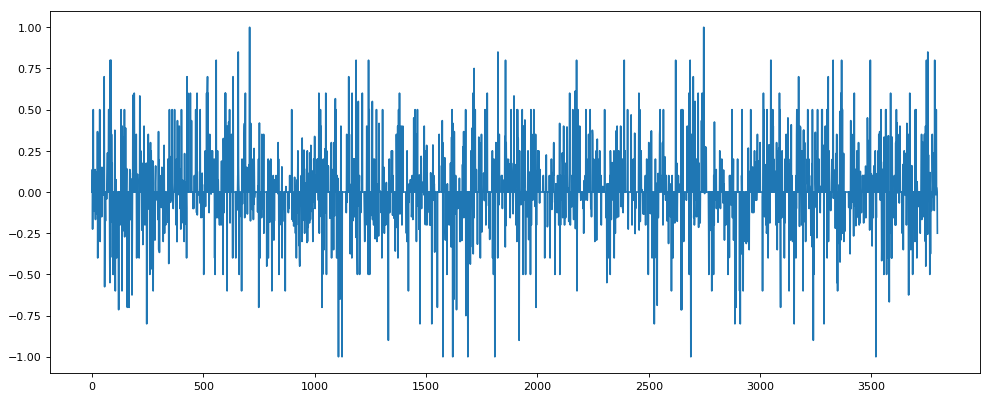

In [243]:
plt.figure(figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(list(range(0, len(polarity_list))), polarity_list) 
plt.show()

# Polarity Function

In [244]:
def polarity_sentences(text):
    
    #import functions
    from textblob import TextBlob
    
    #split text into sentences
    sentences = TextBlob(text).sentences

    #create list
    polarities = []

    #function
    for sentence in sentences:
        sentences_analysis = TextBlob(str(sentence)).sentiment.polarity
        polarities.append(sentences_analysis)
        polar = TextBlob(str(sentence)).sentiment.polarity

    print("Overall Polarity: {}, Polarities (first 10): {}".format(polar, polarities[:9]))
    return polar, polarities

In [245]:
polars = polarity_sentences(IHC_novel)

Overall Polarity: -0.25, Polarities (first 10): [0.0, 0.0, 0.13636363636363635, -0.225, 0.0, -0.11507936507936507, 0.5, 0.012500000000000011, 0.0]


In [246]:
lol = "I love ice cream. Ice cream is great. It is delicious. It's awesome!"

In [247]:
polarity_sentences(lol)

Overall Polarity: 1.0, Polarities (first 10): [0.5, 0.8, 1.0, 1.0]


(1.0, [0.5, 0.8, 1.0, 1.0])

In [248]:
TextBlob(lol).sentiment

Sentiment(polarity=0.825, subjectivity=0.8375)

In [249]:
def subjectivity_sentences(text):
    
    #import functions
    from textblob import TextBlob
    
    #split text into sentences
    sentences = TextBlob(text).sentences

    #create list
    subjectivities = []

    #function
    for sentence in sentences:
        sentences_analysis = TextBlob(str(sentence)).sentiment.subjectivity
        subjectivities.append(sentences_analysis)
        subjectiveness = TextBlob(str(sentence)).sentiment.subjectivity

    print("Overall Subjectiveness: {}, Subjectivities (first 10): {}".format(subjectiveness, subjectivities[:9]))
    return subjectiveness, subjectivities

In [250]:
lol_sub = subjectivity_sentences(lol)

Overall Subjectiveness: 1.0, Subjectivities (first 10): [0.6, 0.75, 1.0, 1.0]


In [251]:
IHC_sub = subjectivity_sentences(IHC_novel)

Overall Subjectiveness: 0.5, Subjectivities (first 10): [0.0, 0.0, 0.45454545454545453, 0.5, 1.0, 0.2396825396825397, 0.5, 0.625, 0.0]


# Removing Entry Numbers/Sentences < 1

In [281]:
def remove_chapter_numbers(text):
    #import functions
    from textblob import TextBlob
    
    #split text into sentences
    sentences = TextBlob(text).sentences
    
    #function
    for sentence in sentences:
        if len(sentence.split()) > 1:
            sentences.append(sentence)
    return " ".join(sentences) 

In [282]:
short_sents = "Hi! Hey, Pal! Howdy! What's good? lol!"

In [283]:
new_ss = []
for sentence in short_sents:
    if len(sentence.split()) > 1:
        new_ss.append(sentence)
    new_shorts = " ".join(new_ss)